<a href="https://colab.research.google.com/github/Rida2300/hu22csen0101003/blob/main/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd

# Step 1: Load the Dataset
# Load the adjusted dataset (ensure the correct file path)
file_path = '/content/Adjusted_Disease_Data_AP_Telangana_1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
  Patient ID   Disease Date of Diagnosis          Place  Gender  Age  \
0       P001    Dengue        07-07-2024      Hyderabad  Female   45   
1       P002   Typhoid        29-02-2024      Hyderabad    Male    6   
2       P003   Typhoid        22-04-2024       Nalgonda  Female   63   
3       P004    Dengue        03-09-2024      Hyderabad  Female   47   
4       P005  COVID-19        09-11-2024  Visakhapatnam    Male   40   

  Age Group Recovered  
0     Adult        No  
1     Child       Yes  
2     Adult        No  
3     Adult        No  
4     Adult       Yes  


In [ ]:
# Step 2: Assess Data Quality
# Check the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Shape of the dataset: (600, 8)

Missing values in each column:
Patient ID           0
Disease              0
Date of Diagnosis    0
Place                0
Gender               0
Age                  0
Age Group            0
Recovered            0
dtype: int64


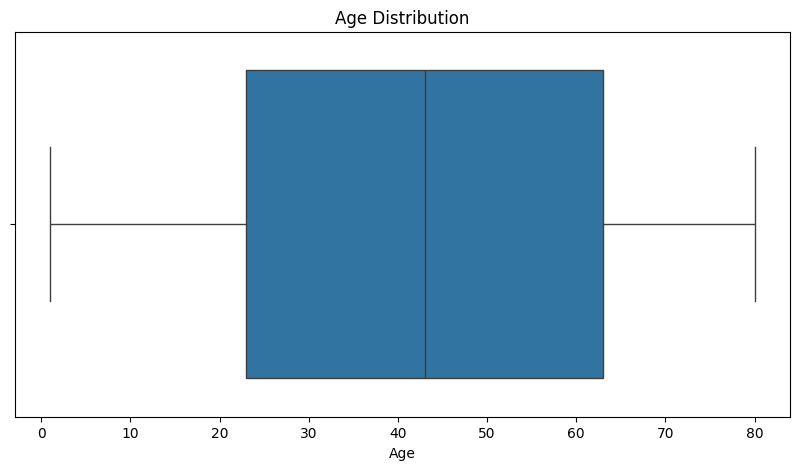

In [ ]:
# Step 3: Identify Outliers
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Age distribution to identify potential outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


In [ ]:
# Step 4: Validate Consistency
# Check unique values in 'Disease' and 'Place' columns
unique_diseases = df['Disease'].unique()
unique_places = df['Place'].unique()

print("\nUnique diseases in the dataset:")
print(unique_diseases)

print("\nUnique places in the dataset:")
print(unique_places)



Unique diseases in the dataset:
['Dengue' 'Typhoid' 'COVID-19' 'Malaria' 'TB']

Unique places in the dataset:
['Hyderabad' 'Nalgonda' 'Visakhapatnam' 'Kurnool' 'Nizamabad' 'Tirupati'
 'Vijayawada' 'Khammam' 'Nellore' 'Warangal']


In [ ]:
# Step 5: Documentation
# Saving the cleaned dataset (if any modifications were made)
df.to_csv('cleaned_disease_dataset.csv', index=False)

# Document your findings
with open('data_quality_report.txt', 'w') as f:
    f.write("Data Quality Report\n")
    f.write(f"Shape of the dataset: {df.shape}\n")
    f.write("\nMissing values:\n")
    f.write(str(missing_values) + "\n")
    f.write("\nUnique diseases:\n")
    f.write(str(unique_diseases) + "\n")
    f.write("\nUnique places:\n")
    f.write(str(unique_places) + "\n")

print("\nData quality report saved as 'data_quality_report.txt'.")



Data quality report saved as 'data_quality_report.txt'.


In [ ]:
# Descriptive statistics
descriptive_stats = df.describe()
print(descriptive_stats)

              Age
count  600.000000
mean    42.303333
std     23.481559
min      1.000000
25%     23.000000
50%     43.000000
75%     63.000000
max     80.000000


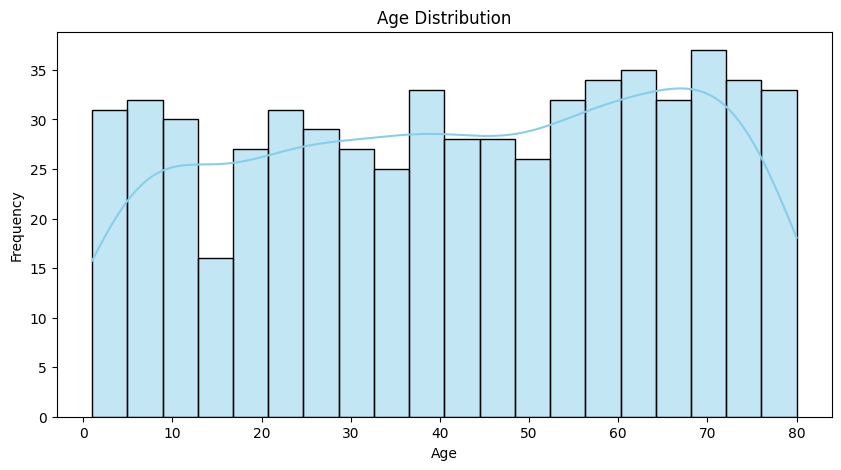

In [ ]:
# Age distribution histogram with color change
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')  # You can choose a color like 'skyblue' or a hex code like '#1f77b4'
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Step 1: Ensure consistent date format (check and fix any inconsistencies first)
# ... (verify and correct your data if needed)

# Step 2: Explicit date conversion with astype
df['Date of Diagnosis'] = pd.to_datetime(df['Date of Diagnosis'], errors='coerce')  # This line was incorrectly indented
df['Date of Diagnosis'] = df['Date of Diagnosis'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

# Step 3: Handling non-date values (replace, set to null, or remove)
# ... (handle any non-date values as needed)

# ... (rest of your plotting code remains the same)

<ipython-input-10-4ad43ef580f1>:11: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  dates = mdates.date2num(date_counts['Date of Diagnosis'].dt.to_pydatetime())


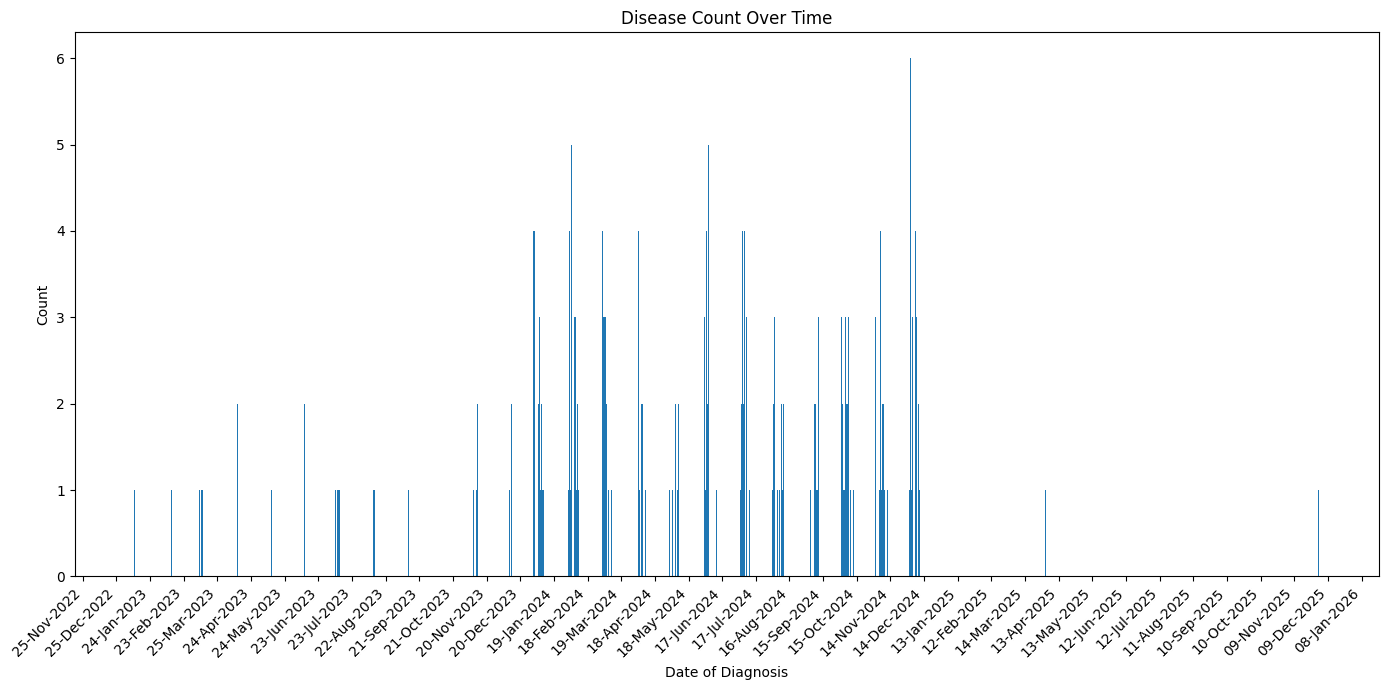

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# ... (your previous code to parse and format dates)

# Group data by date and count occurrences
date_counts = df.groupby('Date of Diagnosis')['Date of Diagnosis'].count().reset_index(name='Count')

# Convert dates to matplotlib dates
dates = mdates.date2num(date_counts['Date of Diagnosis'].dt.to_pydatetime())

# Plotting using matplotlib
plt.figure(figsize=(14, 7))
plt.bar(dates, date_counts['Count'])

# Set Date Formatting for the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.title('Disease Count Over Time')
plt.xlabel('Date of Diagnosis')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

<ipython-input-8-631fb95aa82a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Disease', palette='viridis')  # Use color palettes like 'viridis', 'coolwarm', or pass a list of colors


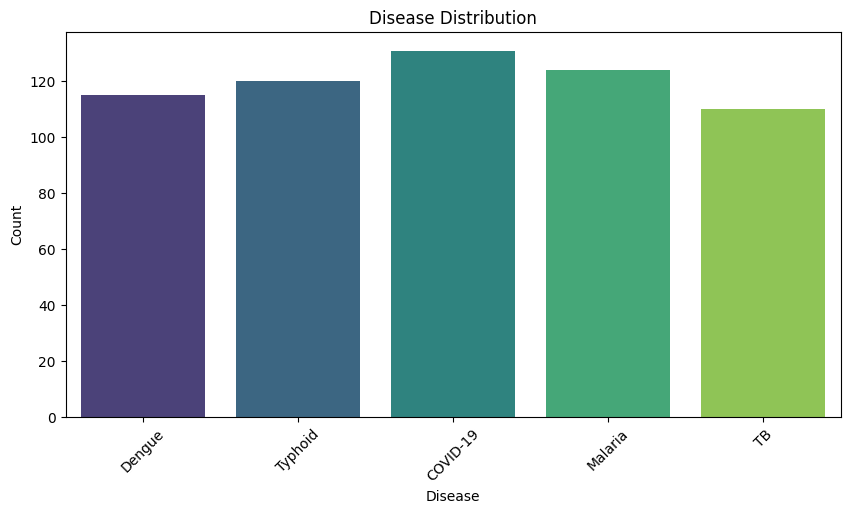

In [ ]:
# Disease distribution bar plot with color palette
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Disease', palette='viridis')  # Use color palettes like 'viridis', 'coolwarm', or pass a list of colors
plt.title('Disease Distribution')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

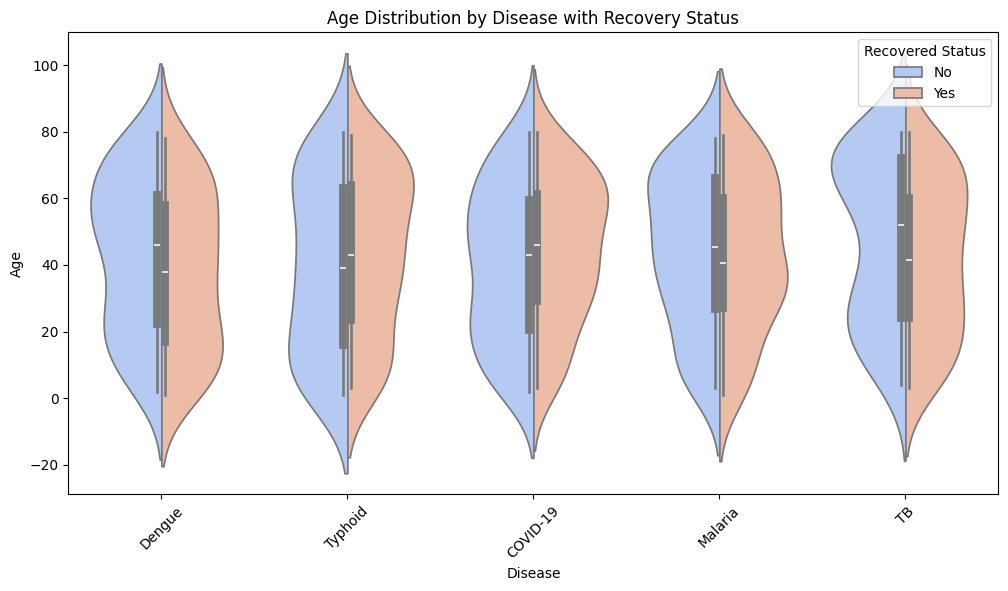

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='Disease', y='Age', hue='Recovered', split=True, palette='coolwarm')
plt.title('Age Distribution by Disease with Recovery Status')
plt.xlabel('Disease')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Recovered Status')
plt.show()


  Patient ID   Disease Date of Diagnosis          Place  Gender  Age  \
0       P001    Dengue        07-07-2024      Hyderabad  Female   45   
1       P002   Typhoid        29-02-2024      Hyderabad    Male    6   
2       P003   Typhoid        22-04-2024       Nalgonda  Female   63   
3       P004    Dengue        03-09-2024      Hyderabad  Female   47   
4       P005  COVID-19        09-11-2024  Visakhapatnam    Male   40   

  Age Group Recovered  
0     Adult        No  
1     Child       Yes  
2     Adult        No  
3     Adult        No  
4     Adult       Yes  


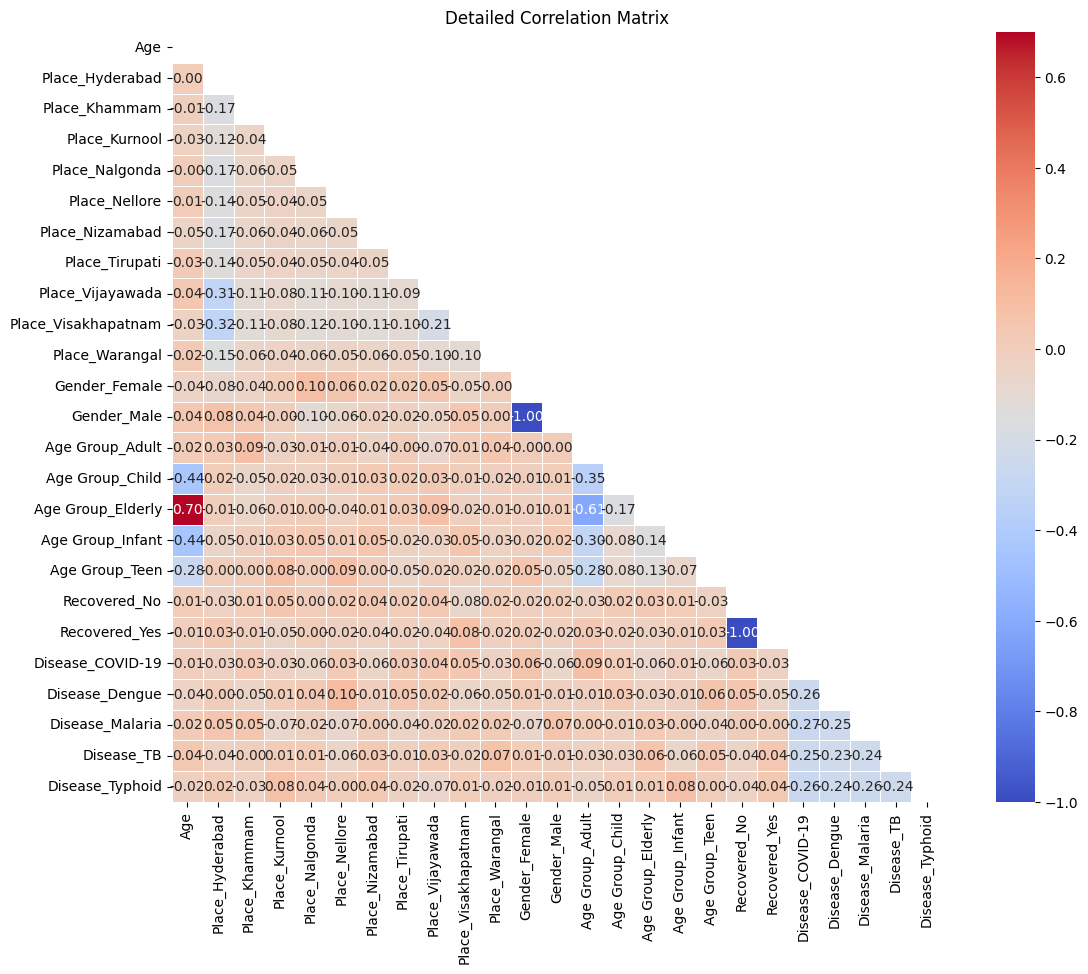

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from a CSV file
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/content/Adjusted_Disease_Data_AP_Telangana_1.csv')

# Check the initial rows of the DataFrame to ensure it's loaded correctly
print(df.head())

# Separate columns to keep unchanged and columns to encode
df_non_encoded = df[['Patient ID', 'Date of Diagnosis', 'Age']]
df_to_encode = df[['Place', 'Gender', 'Age Group', 'Recovered', 'Disease']]

# Perform one-hot encoding on the selected columns
df_encoded = pd.get_dummies(df_to_encode)

# Concatenate the non-encoded and encoded DataFrames
df_final = pd.concat([df_non_encoded, df_encoded], axis=1)

# Set 'Patient ID' as the index to avoid it in the correlation calculations
df_final.set_index('Patient ID', inplace=True)

# Drop 'Date of Diagnosis' as it's not required for the correlation matrix
df_corr = df_final.drop(columns=['Date of Diagnosis'], errors='ignore')  # Use errors='ignore' to avoid issues if column not found

# Check for any non-numeric columns inadvertently included
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the correlation matrix with masking for the upper triangle
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask for the upper triangle
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title('Detailed Correlation Matrix')
plt.show()


<ipython-input-12-0db5e1682854>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Disease', palette='Set2')


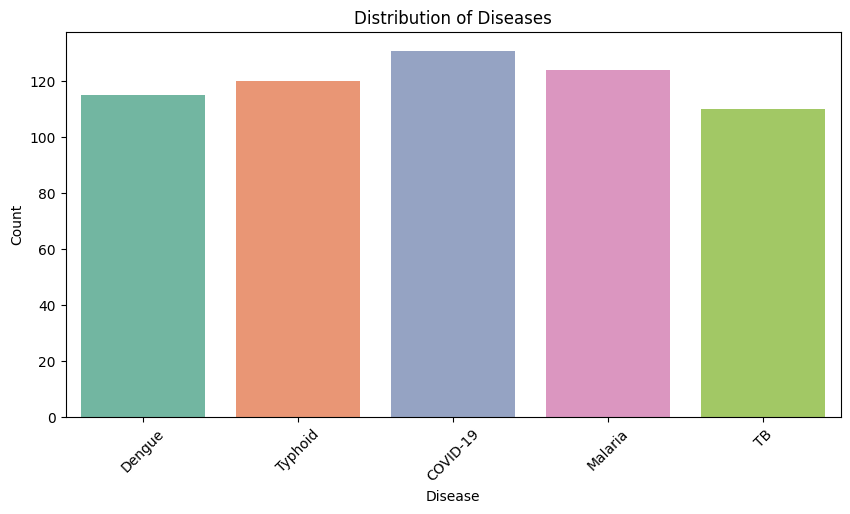

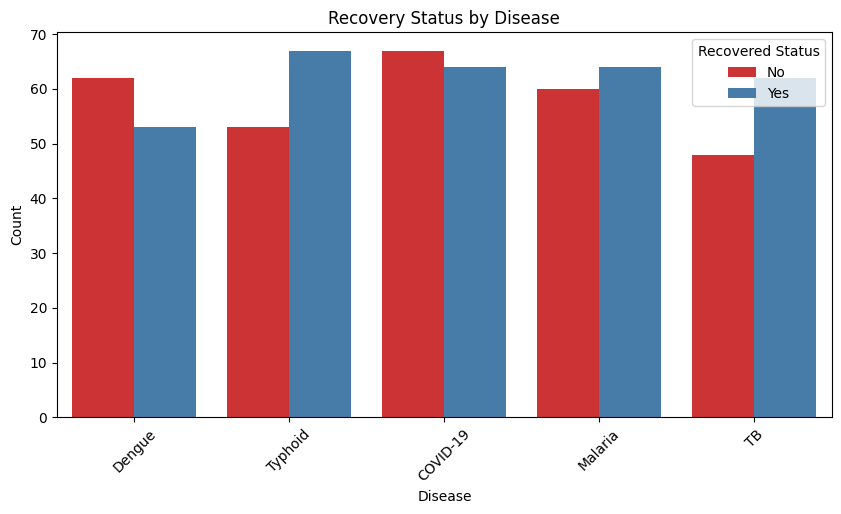

<ipython-input-12-0db5e1682854>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')


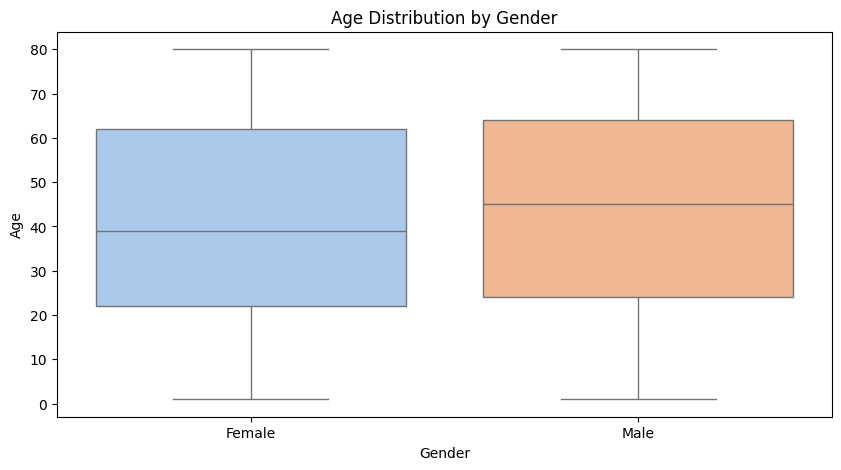

In [ ]:
# Visualize the distribution of diseases
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Disease', palette='Set2')
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of recovery status by disease
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Disease', hue='Recovered', palette='Set1')
plt.title('Recovery Status by Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Recovered Status')
plt.show()

# Visualize age distribution by gender
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Age', palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


In [ ]:
# Install category_encoders if not already installed
!pip install category_encoders

<ipython-input-24-964929004f7b>:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


X data types:
 Age                    int64
Place_Khammam           bool
Place_Kurnool           bool
Place_Nalgonda          bool
Place_Nellore           bool
Place_Nizamabad         bool
Place_Tirupati          bool
Place_Vijayawada        bool
Place_Visakhapatnam     bool
Place_Warangal          bool
Gender_Male             bool
Age Group_Child         bool
Age Group_Elderly       bool
Age Group_Infant        bool
Age Group_Teen          bool
Recovered_Yes           bool
dtype: object
y unique values:
 ['Dengue' 'Typhoid' 'COVID-19' 'Malaria' 'TB']
Training and test sets created successfully.
Model trained successfully.
Predictions made successfully.
Confusion Matrix:
[[6 4 5 6 9]
 [2 7 4 1 5]
 [1 7 3 7 6]
 [2 5 7 4 6]
 [6 8 3 6 0]]

Classification Report:
              precision    recall  f1-score   support

    COVID-19       0.35      0.20      0.26        30
      Dengue       0.23      0.37      0.28        19
     Malaria       0.14      0.12      0.13        24
          TB 

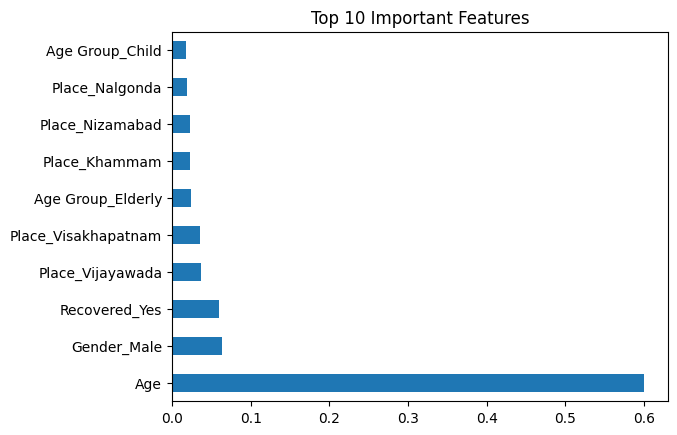

In [ ]:

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import category_encoders as ce
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
file_path = '/content/Adjusted_Disease_Data_AP_Telangana_1.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 2: Data Preparation
# Convert 'Date of Diagnosis' to datetime if needed, then drop it
if 'Date of Diagnosis' in df.columns:
    df['Date of Diagnosis'] = pd.to_datetime(df['Date of Diagnosis'], errors='coerce')
    df.drop(columns=['Date of Diagnosis'], inplace=True)

# Step 3: Handle Missing Values (if any)
df.fillna(method='ffill', inplace=True)

# Step 4: Encode Categorical Variables
X = df.drop(columns=['Disease', 'Patient ID'])  # Drop non-predictive 'Patient ID'
y = df['Disease']  # Target variable

# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, columns=['Place', 'Gender', 'Age Group', 'Recovered'], drop_first=True)

# Ensure y is a pandas Series
if not isinstance(y, pd.Series):
    y = pd.Series(y)

# Check the data types and structure
print("X data types:\n", X.dtypes)
print("y unique values:\n", y.unique())

# Step 5: Split the Dataset
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Training and test sets created successfully.")
except Exception as e:
    print("Error during train-test split:", e)

# Step 6: Train the Model
try:
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("Model trained successfully.")
except Exception as e:
    print("Error during model fitting:", e)

# Step 7: Make Predictions
try:
    y_pred = model.predict(X_test)
    print("Predictions made successfully.")
except Exception as e:
    print("Error during prediction:", e)

# Step 8: Evaluate the Model
try:
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
except Exception as e:
    print("Error during evaluation:", e)

# Optional: Feature Importance
try:
    importances = model.feature_importances_
    feature_importance = pd.Series(importances, index=X.columns)
    feature_importance.nlargest(10).plot(kind='barh')
    plt.title('Top 10 Important Features')
    plt.show()
except Exception as e:
    print("Error during feature importance plot:", e)


In [ ]:
# ... (previous code above)

# Step 4: Encode Categorical Variables
X = df.drop(columns=['Disease', 'Patient ID'])  # Drop non-predictive 'Patient ID'
y = df['Disease']  # Target variable

# Print unique places before encoding
print("Unique places before encoding:")
print(X['Place'].unique())

# One-Hot Encoding for categorical variables
X = pd.get_dummies(X, columns=['Place', 'Gender', 'Age Group', 'Recovered'], drop_first=True)

# Print the columns after encoding to see the transformed 'Place' columns
print("Columns after encoding:")
print(X.columns)

# Ensure y is a pandas Series
if not isinstance(y, pd.Series):
    y = pd.Series(y)

# ... (rest of the code)


Unique places before encoding:
['Hyderabad' 'Nalgonda' 'Visakhapatnam' 'Kurnool' 'Nizamabad' 'Tirupati'
 'Vijayawada' 'Khammam' 'Nellore' 'Warangal']
Columns after encoding:
Index(['Age', 'Place_Khammam', 'Place_Kurnool', 'Place_Nalgonda',
       'Place_Nellore', 'Place_Nizamabad', 'Place_Tirupati',
       'Place_Vijayawada', 'Place_Visakhapatnam', 'Place_Warangal',
       'Gender_Male', 'Age Group_Child', 'Age Group_Elderly',
       'Age Group_Infant', 'Age Group_Teen', 'Recovered_Yes'],
      dtype='object')


In [ ]:
# Step 4: Encode Categorical Variables
X = df.drop(columns=['Disease', 'Patient ID'])  # Drop non-predictive 'Patient ID'
y = df['Disease']  # Target variable

# Print unique places before encoding
print("Unique places before encoding:")
print(X['Place'].unique())

# One-Hot Encoding for categorical variables without dropping any category
X = pd.get_dummies(X, columns=['Place', 'Gender', 'Age Group', 'Recovered'], drop_first=False)

# Print the columns after encoding to see the transformed 'Place' columns
print("Columns after encoding (with all places):")
print(X.columns)


Unique places before encoding:
['Hyderabad' 'Nalgonda' 'Visakhapatnam' 'Kurnool' 'Nizamabad' 'Tirupati'
 'Vijayawada' 'Khammam' 'Nellore' 'Warangal']
Columns after encoding (with all places):
Index(['Age', 'Place_Hyderabad', 'Place_Khammam', 'Place_Kurnool',
       'Place_Nalgonda', 'Place_Nellore', 'Place_Nizamabad', 'Place_Tirupati',
       'Place_Vijayawada', 'Place_Visakhapatnam', 'Place_Warangal',
       'Gender_Female', 'Gender_Male', 'Age Group_Adult', 'Age Group_Child',
       'Age Group_Elderly', 'Age Group_Infant', 'Age Group_Teen',
       'Recovered_No', 'Recovered_Yes'],
      dtype='object')


<ipython-input-29-583ecef83ab4>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Unique diseases before encoding:
['Dengue' 'Typhoid' 'COVID-19' 'Malaria' 'TB']
Columns after encoding:
Index(['Age', 'Year', 'Month', 'Day', 'Weekday', 'Place_Hyderabad',
       'Place_Khammam', 'Place_Kurnool', 'Place_Nalgonda', 'Place_Nellore',
       'Place_Nizamabad', 'Place_Tirupati', 'Place_Vijayawada',
       'Place_Visakhapatnam', 'Place_Warangal', 'Gender_Female', 'Gender_Male',
       'Age Group_Adult', 'Age Group_Child', 'Age Group_Elderly',
       'Age Group_Infant', 'Age Group_Teen', 'Recovered_No', 'Recovered_Yes'],
      dtype='object')
Shape of X after encoding: (600, 24)
Length of y (target variable): 600
Confusion Matrix:
[[3 9 6 9 3]
 [3 6 6 3 1]
 [7 4 4 4 5]
 [5 5 2 5 7]
 [8 4 8 3 0]]

Classification Report:
              precision    recall  f1-score   support

    COVID-19       0.12      0.10      0.11        30
      Dengue       0.21      0.32      0.26        19
     Malaria       0.15      0.17      0.16        24
          TB       0.21      0.21      0.21 

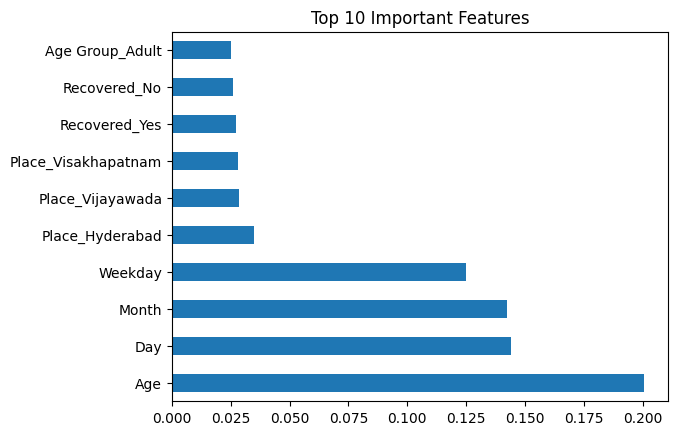

In [ ]:
# Step 1: Load the Dataset
file_path = '/content/Adjusted_Disease_Data_AP_Telangana_1.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 2: Convert 'Date of Diagnosis' to datetime
df['Date of Diagnosis'] = pd.to_datetime(df['Date of Diagnosis'], errors='coerce')

# Step 3: Extract useful date features
df['Year'] = df['Date of Diagnosis'].dt.year
df['Month'] = df['Date of Diagnosis'].dt.month
df['Day'] = df['Date of Diagnosis'].dt.day
df['Weekday'] = df['Date of Diagnosis'].dt.weekday  # Monday=0, Sunday=6

# Optional: Drop the original date column and Patient ID
df.drop(columns=['Date of Diagnosis', 'Patient ID'], inplace=True)

# Step 4: Handle Missing Values
df.fillna(method='ffill', inplace=True)

# Step 5: Encode Categorical Variables
X = df.drop(columns=['Disease'])  # Features
y = df['Disease']  # Target variable

# Print unique diseases before encoding
print("Unique diseases before encoding:")
print(y.unique())

# One-Hot Encoding for categorical variables without dropping any category
X_encoded = pd.get_dummies(X, drop_first=False)

# Print the columns after encoding to see the transformed data
print("Columns after encoding:")
print(X_encoded.columns)

# Check shapes to ensure data integrity
print("Shape of X after encoding:", X_encoded.shape)
print("Length of y (target variable):", len(y))

# Step 6: Split the Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 7: Train the Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Feature Importance
import matplotlib.pyplot as plt
import pandas as pd

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_encoded.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import category_encoders as ce

# Step 1: Load the Dataset
file_path = '/content/Adjusted_Disease_Data_AP_Telangana_1.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 2: Data Preparation
df['Date of Diagnosis'] = pd.to_datetime(df['Date of Diagnosis'], errors='coerce')
df.drop(columns=['Patient ID', 'Date of Diagnosis'], inplace=True)

# Step 3: Handle Missing Values
df.fillna(method='ffill', inplace=True)

# Step 4: Filter for specific diseases (Malaria and COVID-19)
diseases_to_keep = ['Malaria', 'COVID-19']
df_filtered = df[df['Disease'].isin(diseases_to_keep)]
print(f"Number of rows after filtering: {len(df_filtered)}")

# Prepare features and target variable
X = df_filtered.drop(columns=['Disease'])  # Features
y = df_filtered['Disease']  # Target variable

# Ensure y is a pandas Series
if not isinstance(y, pd.Series):
    y = pd.Series(y)

# Reset indexes to avoid index mismatch
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Check the shapes before encoding
print(f"Shape of X before encoding: {X.shape}")
print(f"Shape of y before encoding: {y.shape}")

# Using Target Encoding for categorical features
target_encoder = ce.TargetEncoder(cols=['Place', 'Gender', 'Age Group', 'Recovered'])

# Fit and transform the features
try:
    X_encoded = target_encoder.fit_transform(X, y)
    print(f"Shape of X_encoded after encoding: {X_encoded.shape}")
except Exception as e:
    print("Error during target encoding:", e)

# Step 5: Check for consistency in sizes before splitting
if X_encoded.shape[0] != y.shape[0]:
    print(f"Mismatch: X_encoded has {X_encoded.shape[0]} rows, y has {y.shape[0]} rows.")
else:
    # Proceed with the train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Step 6: Train the Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 7: Make Predictions
    y_pred = model.predict(X_test)

    # Step 8: Evaluate the Model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Number of rows after filtering: 255
Shape of X before encoding: (255, 5)
Shape of y before encoding: (255,)
Error during target encoding: 'numpy.ndarray' object has no attribute 'groupby'
Mismatch: X_encoded has 600 rows, y has 255 rows.


<ipython-input-38-ca09801f9823>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load the Dataset
file_path = '/content/Adjusted_Disease_Data_AP_Telangana_1.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Step 2: Data Preparation
df['Date of Diagnosis'] = pd.to_datetime(df['Date of Diagnosis'], errors='coerce')
df.drop(columns=['Patient ID', 'Date of Diagnosis'], inplace=True)

# Step 3: Handle Missing Values
df.fillna(method='ffill', inplace=True)

# Step 4: Filter for specific diseases (Malaria and COVID-19)
diseases_to_keep = ['Malaria', 'COVID-19']
df_filtered = df[df['Disease'].isin(diseases_to_keep)]
print(f"Number of rows after filtering: {len(df_filtered)}")

# Prepare features and target variable
X = df_filtered.drop(columns=['Disease'])  # Features
y = df_filtered['Disease']  # Target variable

# Ensure y is a pandas Series
if not isinstance(y, pd.Series):
    y = pd.Series(y)

# Reset indexes to avoid index mismatch
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Check the shapes before encoding
print(f"Shape of X before encoding: {X.shape}")
print(f"Shape of y before encoding: {y.shape}")

# Step 5: One-Hot Encoding for categorical features
categorical_cols = ['Place', 'Gender', 'Age Group', 'Recovered']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Check the shape after encoding
print(f"Shape of X_encoded after encoding: {X_encoded.shape}")

# Ensure the number of rows is consistent
if X_encoded.shape[0] != y.shape[0]:
    print(f"Mismatch: X_encoded has {X_encoded.shape[0]} rows, y has {y.shape[0]} rows.")
else:
    # Step 6: Split the Dataset
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    # Step 7: Train the Model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Step 8: Make Predictions
    y_pred = model.predict(X_test)

    # Step 9: Evaluate the Model
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


<ipython-input-40-0e501cdd85e8>:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Number of rows after filtering: 255
Shape of X before encoding: (255, 5)
Shape of y before encoding: (255,)
Shape of X_encoded after encoding: (255, 16)
Confusion Matrix:
[[12 14]
 [18  7]]

Classification Report:
              precision    recall  f1-score   support

    COVID-19       0.40      0.46      0.43        26
     Malaria       0.33      0.28      0.30        25

    accuracy                           0.37        51
   macro avg       0.37      0.37      0.37        51
weighted avg       0.37      0.37      0.37        51



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='accuracy', verbose=2)

# Fit Grid Search
grid_search.fit(X_encoded, y)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, m

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from category_encoders import TargetEncoder

# Example dataset creation
data = {
    'Age': np.random.randint(0, 100, size=100),
    'Place': np.random.choice(['Hyderabad', 'Khammam', 'Kurnool', 'Nalgonda', 'Nellore',
                                'Nizamabad', 'Tirupati', 'Vijayawada', 'Visakhapatnam', 'Warangal'], size=100),
    'Recovered': np.random.choice(['Yes', 'No'], size=100),
    'Disease': np.random.choice(['COVID-19', 'Malaria'], size=100)  # Example disease labels
}

df = pd.DataFrame(data)

# Prepare features and target
X = df[['Age', 'Place', 'Recovered']]
y = df['Disease']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Place', 'Recovered'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Target Encoder if needed, here we skip since we used one-hot encoding
# Prepare and train a model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Prepare prediction data
cities = ['Hyderabad', 'Khammam', 'Kurnool', 'Nalgonda', 'Nellore',
          'Nizamabad', 'Tirupati', 'Vijayawada', 'Visakhapatnam', 'Warangal']

# Creating the prediction DataFrame
prediction_data = pd.DataFrame({
    'Age': np.random.randint(0, 100, size=10),  # Random ages
    'Place': cities,  # List of cities
    'Recovered': np.random.choice(['Yes', 'No'], size=10)  # Include 'Recovered'
})

# One-hot encode prediction data
prediction_data_encoded = pd.get_dummies(prediction_data, columns=['Place', 'Recovered'], drop_first=True)

# Ensure that the prediction data has the same columns as the training data
for col in X.columns:
    if col not in prediction_data_encoded.columns:
        prediction_data_encoded[col] = 0

# Rearranging the columns to match the training set
X_pred_encoded = prediction_data_encoded[X.columns]

# Make predictions using the trained model
predictions = model.predict(X_pred_encoded)

# Creating prediction results DataFrame
prediction_results = pd.DataFrame({
    'Place': prediction_data['Place'],
    'Predicted Disease': predictions
})

print("Prediction Results:\n", prediction_results)


              precision    recall  f1-score   support

    COVID-19       0.56      0.50      0.53        10
     Malaria       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20

Prediction Results:
            Place Predicted Disease
0      Hyderabad           Malaria
1        Khammam          COVID-19
2        Kurnool           Malaria
3       Nalgonda          COVID-19
4        Nellore           Malaria
5      Nizamabad          COVID-19
6       Tirupati          COVID-19
7     Vijayawada           Malaria
8  Visakhapatnam          COVID-19
9       Warangal           Malaria


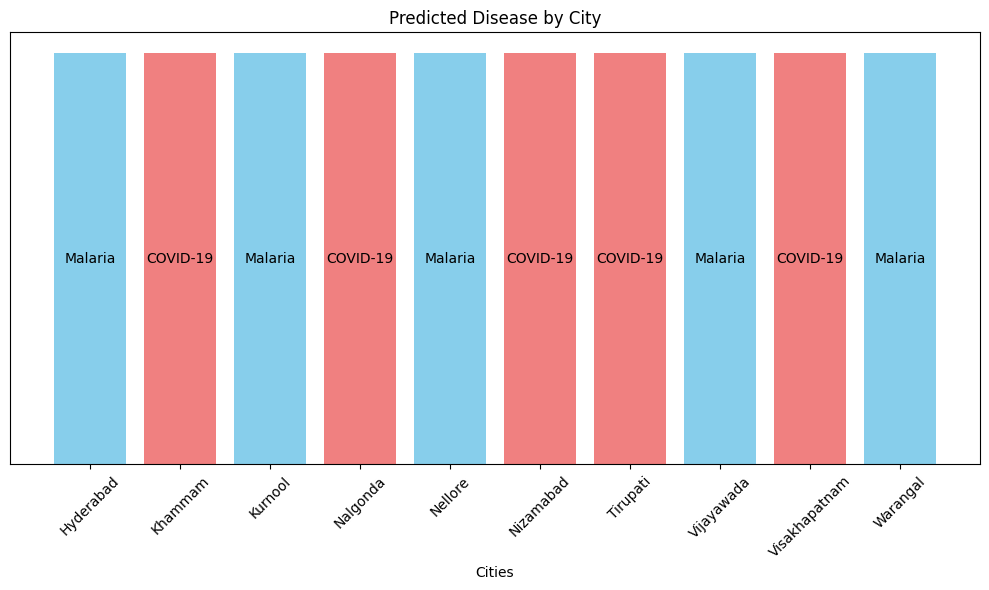

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Your prediction results
data = {
    'Place': ['Hyderabad', 'Khammam', 'Kurnool', 'Nalgonda', 'Nellore',
              'Nizamabad', 'Tirupati', 'Vijayawada', 'Visakhapatnam', 'Warangal'],
    'Predicted Disease': ['Malaria', 'COVID-19', 'Malaria', 'COVID-19', 'Malaria',
                          'COVID-19', 'COVID-19', 'Malaria', 'COVID-19', 'Malaria']
}

# Create DataFrame
predictions_df = pd.DataFrame(data)

# Define colors for each disease
colors = predictions_df['Predicted Disease'].map({'COVID-19': 'lightcoral', 'Malaria': 'skyblue'})

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(predictions_df['Place'], [1] * len(predictions_df), color=colors)

# Adding annotations to each bar
for bar, disease in zip(bars, predictions_df['Predicted Disease']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, disease,
             ha='center', va='center', fontsize=10, color='black')

# Add labels and title
plt.title('Predicted Disease by City')
plt.xlabel('Cities')
plt.xticks(rotation=45)
plt.yticks([])  # Remove y-axis ticks as we only need to show disease types

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import folium

# Assuming you have a DataFrame `df` with your original dataset
# and you have a column for areas and predictions.
# Replace this with your actual DataFrame
df = pd.DataFrame({
    'Area': ['Hyderabad', 'Khammam', 'Kurnool', 'Nalgonda', 'Nellore',
              'Nizamabad', 'Tirupati', 'Vijayawada', 'Visakhapatnam', 'Warangal'],
    'Prediction': [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
})

# Coordinates for each area (update with actual coordinates if needed)
coordinates = {
    'Hyderabad': (17.3851, 78.4867),
    'Tirupati': (13.6288, 79.4192),
    'Visakhapatnam': (17.6868, 83.2185),
    'Vijayawada': (16.5062, 80.6480),
    'Warangal': (17.9784, 79.5941),
    'Khammam': (17.2473, 80.1505),
    'Nizamabad': (17.6735, 78.0980),
    'Nellore': (14.4425, 79.9939),
    'Kurnool': (15.8281, 78.0373),
    'Nalgonda': (17.0502, 79.1914),
}

# Create a folium map centered around India
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add markers for each area based on predictions
for index, row in df.iterrows():
    area = row['Area']
    prediction = row['Prediction']
    lat, lon = coordinates[area]  # Get coordinates from the dictionary

    color = 'green' if prediction == 1 else 'blue'  # Green for Malaria, Blue for COVID-19
    folium.Marker(
        location=[lat, lon],
        popup=f"Area: {area}, Prediction: {'Malaria' if prediction == 1 else 'COVID-19'}",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Save the map to an HTML file or display it
m.save('predictions_map_india.html')
m  # This will display the map in Jupyter/Colab environments
